<a href="https://colab.research.google.com/github/bigirimanainnocent12/API_Projet_1/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***API REST***

# ***Modèle Conceptuel de Données (MCD)***

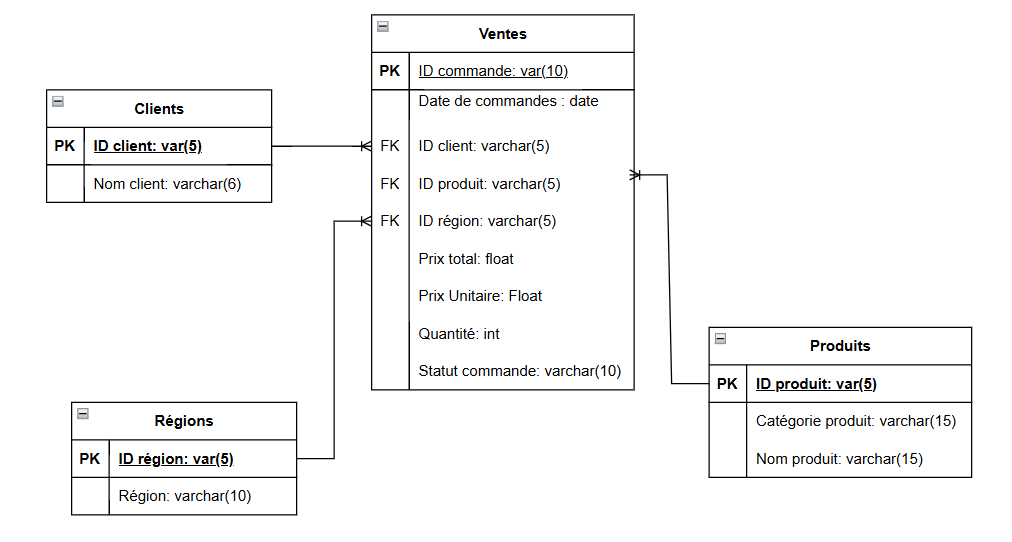

# ***Code SQL POUR LA CREATION DE LA BASE DE DONNEES AVEC SQL SERVER***

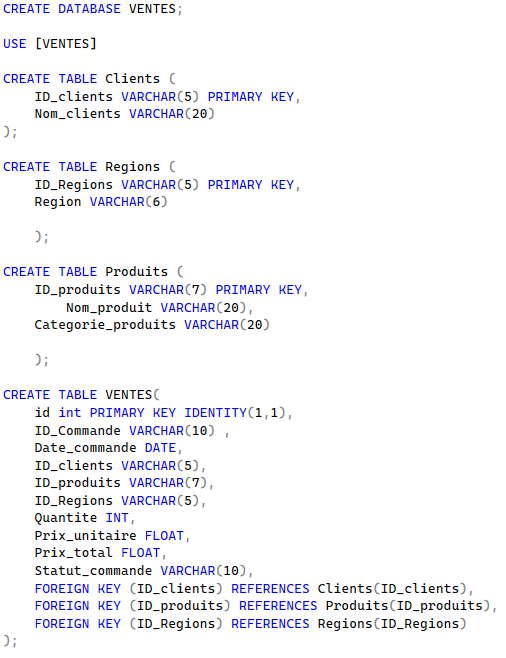

# ***CODE POUR INSERER LES DONNEES DANS LA BASE DE DONNÉES***

**Table Clien**ts

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from typing import Optional
import logging

# Configuration du logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# CONFIGURATION - MODIFIEZ ICI
FICHIER_EXCEL = "Clients.xlsx"    # Nom de votre fichier Excel
TABLE_SQL = "Clients"                    # Nom de votre table SQL

def read_excel_file(file_path: str) -> Optional[pd.DataFrame]:
    """
    Lit le fichier Excel et retourne un DataFrame
    """
    try:
        logger.info(f"Lecture du fichier Excel: {file_path}")
        df = pd.read_excel(file_path)
        logger.info(f"✅ Fichier Excel lu avec succès. {len(df)} lignes trouvées")
        return df
    except FileNotFoundError:
        logger.error(f"❌ Fichier {file_path} non trouvé")
        return None
    except Exception as e:
        logger.error(f"❌ Erreur lors de la lecture du fichier Excel: {e}")
        return None

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Nettoie les données en supprimant les lignes vides
    """
    initial_count = len(df)
    df_cleaned = df.dropna(how='all')
    cleaned_count = len(df_cleaned)

    if initial_count > cleaned_count:
        logger.info(f"🧹 {initial_count - cleaned_count} lignes vides supprimées")

    logger.info(f"✅ {cleaned_count} lignes valides après nettoyage")
    return df_cleaned

def insert_to_sql(df: pd.DataFrame, table_name: str) -> bool:
    """
    Insère les données dans SQL Server
    """
    try:
        logger.info("Connexion à SQL Server (base VENTES)...")
        engine = create_engine(
            "mssql+pyodbc://@localhost/VENTES?"
            "driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
        )

        logger.info(f"Insertion des données dans la table {table_name}...")
        df.to_sql(table_name, engine, if_exists='append', index=False, chunksize=1000)

        engine.dispose()
        logger.info(f"🎉 Succès ! {len(df)} lignes ajoutées à la table {table_name}")
        return True

    except Exception as e:
        logger.error(f"❌ Erreur lors de l'insertion: {e}")
        return False

def main():
    """
    Fonction principale d'importation Excel vers SQL Server
    """
    logger.info("🚀 Début de l'importation Excel vers base VENTES")

    # 1. Lecture du fichier Excel
    df = read_excel_file(FICHIER_EXCEL)
    if df is None:
        logger.error("⚠️ Arrêt du programme - impossible de lire le fichier Excel")
        return False

    # 2. Nettoyage des données
    df_clean = clean_data(df)
    if len(df_clean) == 0:
        logger.warning("⚠️ Aucune donnée valide trouvée après nettoyage")
        return False

    # 3. Aperçu des données
    logger.info("📊 Aperçu des données:")
    logger.info(f"Colonnes: {list(df_clean.columns)}")
    logger.info(f"Premières lignes:\n{df_clean.head()}")

    # 4. Insertion en base
    success = insert_to_sql(df_clean, TABLE_SQL)

    if success:
        logger.info("✅ Importation terminée avec succès")
    else:
        logger.error("❌ Échec de l'importation")

    return success

if __name__ == "__main__":
    main()

# Table Regions

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from typing import Optional
import logging

# Configuration du logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# CONFIGURATION - MODIFIEZ ICI
FICHIER_EXCEL = "Regions.xlsx"    # Nom de votre fichier Excel
TABLE_SQL = "Regions"                    # Nom de votre table SQL

def read_excel_file(file_path: str) -> Optional[pd.DataFrame]:
    """
    Lit le fichier Excel et retourne un DataFrame
    """
    try:
        logger.info(f"Lecture du fichier Excel: {file_path}")
        df = pd.read_excel(file_path)
        logger.info(f"✅ Fichier Excel lu avec succès. {len(df)} lignes trouvées")
        return df
    except FileNotFoundError:
        logger.error(f"❌ Fichier {file_path} non trouvé")
        return None
    except Exception as e:
        logger.error(f"❌ Erreur lors de la lecture du fichier Excel: {e}")
        return None

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Nettoie les données en supprimant les lignes vides
    """
    initial_count = len(df)
    df_cleaned = df.dropna(how='all')
    cleaned_count = len(df_cleaned)

    if initial_count > cleaned_count:
        logger.info(f"🧹 {initial_count - cleaned_count} lignes vides supprimées")

    logger.info(f"✅ {cleaned_count} lignes valides après nettoyage")
    return df_cleaned

def insert_to_sql(df: pd.DataFrame, table_name: str) -> bool:
    """
    Insère les données dans SQL Server
    """
    try:
        logger.info("Connexion à SQL Server (base VENTES)...")
        engine = create_engine(
            "mssql+pyodbc://@localhost/VENTES?"
            "driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
        )

        logger.info(f"Insertion des données dans la table {table_name}...")
        df.to_sql(table_name, engine, if_exists='append', index=False, chunksize=1000)

        engine.dispose()
        logger.info(f"🎉 Succès ! {len(df)} lignes ajoutées à la table {table_name}")
        return True

    except Exception as e:
        logger.error(f"❌ Erreur lors de l'insertion: {e}")
        return False

def main():
    """
    Fonction principale d'importation Excel vers SQL Server
    """
    logger.info("🚀 Début de l'importation Excel vers base VENTES")

    # 1. Lecture du fichier Excel
    df = read_excel_file(FICHIER_EXCEL)
    if df is None:
        logger.error("⚠️ Arrêt du programme - impossible de lire le fichier Excel")
        return False

    # 2. Nettoyage des données
    df_clean = clean_data(df)
    if len(df_clean) == 0:
        logger.warning("⚠️ Aucune donnée valide trouvée après nettoyage")
        return False

    # 3. Aperçu des données
    logger.info("📊 Aperçu des données:")
    logger.info(f"Colonnes: {list(df_clean.columns)}")
    logger.info(f"Premières lignes:\n{df_clean.head()}")

    # 4. Insertion en base
    success = insert_to_sql(df_clean, TABLE_SQL)

    if success:
        logger.info("✅ Importation terminée avec succès")
    else:
        logger.error("❌ Échec de l'importation")

    return success

if __name__ == "__main__":
    main()

# Table Produits

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from typing import Optional
import logging

# Configuration du logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# CONFIGURATION - MODIFIEZ ICI
FICHIER_EXCEL = "Produit.xlsx"    # Nom de votre fichier Excel
TABLE_SQL = "Produits"                    # Nom de votre table SQL

def read_excel_file(file_path: str) -> Optional[pd.DataFrame]:
    """
    Lit le fichier Excel et retourne un DataFrame
    """
    try:
        logger.info(f"Lecture du fichier Excel: {file_path}")
        df = pd.read_excel(file_path)
        logger.info(f"✅ Fichier Excel lu avec succès. {len(df)} lignes trouvées")
        return df
    except FileNotFoundError:
        logger.error(f"❌ Fichier {file_path} non trouvé")
        return None
    except Exception as e:
        logger.error(f"❌ Erreur lors de la lecture du fichier Excel: {e}")
        return None

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Nettoie les données en supprimant les lignes vides
    """
    initial_count = len(df)
    df_cleaned = df.dropna(how='all')
    cleaned_count = len(df_cleaned)

    if initial_count > cleaned_count:
        logger.info(f"🧹 {initial_count - cleaned_count} lignes vides supprimées")

    logger.info(f"✅ {cleaned_count} lignes valides après nettoyage")
    return df_cleaned

def insert_to_sql(df: pd.DataFrame, table_name: str) -> bool:
    """
    Insère les données dans SQL Server
    """
    try:
        logger.info("Connexion à SQL Server (base VENTES)...")
        engine = create_engine(
            "mssql+pyodbc://@localhost/VENTES?"
            "driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
        )

        logger.info(f"Insertion des données dans la table {table_name}...")
        df.to_sql(table_name, engine, if_exists='append', index=False, chunksize=1000)

        engine.dispose()
        logger.info(f"🎉 Succès ! {len(df)} lignes ajoutées à la table {table_name}")
        return True

    except Exception as e:
        logger.error(f"❌ Erreur lors de l'insertion: {e}")
        return False

def main():
    """
    Fonction principale d'importation Excel vers SQL Server
    """
    logger.info("🚀 Début de l'importation Excel vers base VENTES")

    # 1. Lecture du fichier Excel
    df = read_excel_file(FICHIER_EXCEL)
    if df is None:
        logger.error("⚠️ Arrêt du programme - impossible de lire le fichier Excel")
        return False

    # 2. Nettoyage des données
    df_clean = clean_data(df)
    if len(df_clean) == 0:
        logger.warning("⚠️ Aucune donnée valide trouvée après nettoyage")
        return False

    # 3. Aperçu des données
    logger.info("📊 Aperçu des données:")
    logger.info(f"Colonnes: {list(df_clean.columns)}")
    logger.info(f"Premières lignes:\n{df_clean.head()}")

    # 4. Insertion en base
    success = insert_to_sql(df_clean, TABLE_SQL)

    if success:
        logger.info("✅ Importation terminée avec succès")
    else:
        logger.error("❌ Échec de l'importation")

    return success

if __name__ == "__main__":
    main()

# Tables VENTES

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from typing import Optional
import logging

# Configuration du logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# CONFIGURATION - MODIFIEZ ICI
FICHIER_EXCEL = "VENTES.xlsx"    # Nom de votre fichier Excel
TABLE_SQL = "VENTES"                    # Nom de votre table SQL

def read_excel_file(file_path: str) -> Optional[pd.DataFrame]:
    """
    Lit le fichier Excel et retourne un DataFrame
    """
    try:
        logger.info(f"Lecture du fichier Excel: {file_path}")
        df = pd.read_excel(file_path)
        logger.info(f"✅ Fichier Excel lu avec succès. {len(df)} lignes trouvées")
        return df
    except FileNotFoundError:
        logger.error(f"❌ Fichier {file_path} non trouvé")
        return None
    except Exception as e:
        logger.error(f"❌ Erreur lors de la lecture du fichier Excel: {e}")
        return None

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Nettoie les données en supprimant les lignes vides
    """
    initial_count = len(df)
    df_cleaned = df.dropna(how='all')
    cleaned_count = len(df_cleaned)

    if initial_count > cleaned_count:
        logger.info(f"🧹 {initial_count - cleaned_count} lignes vides supprimées")

    logger.info(f"✅ {cleaned_count} lignes valides après nettoyage")
    return df_cleaned

def insert_to_sql(df: pd.DataFrame, table_name: str) -> bool:
    """
    Insère les données dans SQL Server
    """
    try:
        logger.info("Connexion à SQL Server (base VENTES)...")
        engine = create_engine(
            "mssql+pyodbc://@localhost/VENTES?"
            "driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
        )

        logger.info(f"Insertion des données dans la table {table_name}...")
        df.to_sql(table_name, engine, if_exists='append', index=False, chunksize=1000)

        engine.dispose()
        logger.info(f"🎉 Succès ! {len(df)} lignes ajoutées à la table {table_name}")
        return True

    except Exception as e:
        logger.error(f"❌ Erreur lors de l'insertion: {e}")
        return False

def main():
    """
    Fonction principale d'importation Excel vers SQL Server
    """
    logger.info("🚀 Début de l'importation Excel vers base VENTES")

    # 1. Lecture du fichier Excel
    df = read_excel_file(FICHIER_EXCEL)
    if df is None:
        logger.error("⚠️ Arrêt du programme - impossible de lire le fichier Excel")
        return False

    # 2. Nettoyage des données
    df_clean = clean_data(df)
    if len(df_clean) == 0:
        logger.warning("⚠️ Aucune donnée valide trouvée après nettoyage")
        return False

    # 3. Aperçu des données
    logger.info("📊 Aperçu des données:")
    logger.info(f"Colonnes: {list(df_clean.columns)}")
    logger.info(f"Premières lignes:\n{df_clean.head()}")

    # 4. Insertion en base
    success = insert_to_sql(df_clean, TABLE_SQL)

    if success:
        logger.info("✅ Importation terminée avec succès")
    else:
        logger.error("❌ Échec de l'importation")

    return success

if __name__ == "__main__":
    main()